In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [2]:
# File to Load
spotify_data = "spotify-data.csv"

In [5]:
# Read Spotify File and store into Pandas data frame
spotify_df = pd.read_csv(spotify_data)
spotify_df

,artist_name,artist_genres,album_id,album_name,track_id,track_name,streams (millions),popularity,release_date,markets,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Ed Sheeran,"['pop', 'uk pop']",3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),7qiZfU4dY1lWllzX7mPBI3,Shape of You,"2,989",87,2017-03-03,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.0931,-3.183,0.0,0.0802,95.977,4.0,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.931
1,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",4yP0hdKOZPNshxUOjY0cZj,After Hours,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,"2,673",93,2020-03-20,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.0897,-5.934,1.0,0.0598,171.005,4.0,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,audio_features,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.334
2,Tones And I,"['australian pop', 'pop']",0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,"2,425",82,2019-10-17,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1490,-6.400,0.0,0.0924,98.027,4.0,https://api.spotify.com/v1/tracks/2XU0oxnq2qxC...,audio_features,spotify:track:2XU0oxnq2qxCpomAAuJY8K,0.513
3,Post Malone,"['dfw rap', 'melodic rap', 'rap']",6trNtQUgC8cgbWcqoMYkOR,beerbongs & bentleys,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),"2,312",85,2018-04-27,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1310,-6.136,0.0,0.0712,159.801,4.0,https://api.spotify.com/v1/tracks/0e7ipj03S05B...,audio_features,spotify:track:0e7ipj03S05BNilyu5bRzt,0.129
4,Lewis Capaldi,"['pop', 'uk pop']",5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,"2,182",88,2019-05-17,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1050,-5.679,1.0,0.0319,109.891,4.0,https://api.spotify.com/v1/tracks/7qEHsqek33rT...,audio_features,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,benny blanco,"['electropop', 'pop', 'pop rap']",7pkLXlFdpQDfmHujT2AbBK,Eastside (with Halsey & Khalid),0d2iYfpKoM0QCKvcLCkBao,Eastside (with Halsey & Khalid),"1,247",79,2018-07-12,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1160,-7.648,0.0,0.3210,89.391,4.0,https://api.spotify.com/v1/tracks/0d2iYfpKoM0Q...,audio_features,spotify:track:0d2iYfpKoM0QCKvcLCkBao,0.319
96,Charlie Puth,"['dance pop', 'pop', 'viral pop']",6E0p38TjcK490itZ1Ns7bD,Nine Track Mind,68EMU2RD1ECNeOeJ5qAXCV,We Don't Talk Anymore (feat. Selena Gomez),"1,243",59,2015-11-05,['GB'],...,0.1790,-8.053,0.0,0.1340,100.017,4.0,https://api.spotify.com/v1/tracks/68EMU2RD1ECN...,audio_features,spotify:track:68EMU2RD1ECNeOeJ5qAXCV,0.352
97,Major Lazer,"['dance pop', 'edm', 'electro house', 'moombah...",4SpuU8HT32EymGgFPL08LE,Cold Water (feat. Justin Bieber & MØ),6Bjtr3tPdto5nyuLYf61sN,Cold Water (feat. Justin Bieber & MØ),"1,238",72,2016-07-22,"['AD', 'AE', 'AL', 'AO', 'AR', 'AT', 'AZ', 'BA...",...,0.1560,-5.092,0.0,0.0432,92.943,4.0,https://api.spotify.com/v1/tracks/6Bjtr3tPdto5...,audio_features,spotify:track:6Bjtr3tPdto5nyuLYf61sN,0.501
98,OMI,['dance pop'],7cVXH4slEYzGjDh498OFyL,Me 4 U,7vFoFDWqTX0mHzLfrF1Cfy,Cheerleader - Felix Jaehn Remix Radio Edit,"1,235",78,2015-10-16,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,0.1600,-6.237,1.0,0.0309,118.016,4.0,https://api.spotify.com/v1/tracks/7vFoFDWqTX0m...,audio_features,spotify:track:7vFoFDWqTX0mHzLfrF1Cfy,0.603


In [6]:
spotify_df = spotify_df.replace(',','', regex = True)
spotify_df['streams (millions)'] = spotify_df['streams (millions)'].astype(float, errors = 'raise')
spotify_df

,artist_name,artist_genres,album_id,album_name,track_id,track_name,streams (millions),popularity,release_date,markets,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Ed Sheeran,['pop' 'uk pop'],3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),7qiZfU4dY1lWllzX7mPBI3,Shape of You,2989.0,87,2017-03-03,['AD' 'AE' 'AG' 'AL' 'AM' 'AO' 'AR' 'AT' 'AU' ...,...,0.0931,-3.183,0.0,0.0802,95.977,4.0,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.931
1,The Weeknd,['canadian contemporary r&b' 'canadian pop' 'p...,4yP0hdKOZPNshxUOjY0cZj,After Hours,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,2673.0,93,2020-03-20,['AD' 'AE' 'AG' 'AL' 'AM' 'AO' 'AR' 'AT' 'AU' ...,...,0.0897,-5.934,1.0,0.0598,171.005,4.0,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,audio_features,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.334
2,Tones And I,['australian pop' 'pop'],0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,2425.0,82,2019-10-17,['AD' 'AE' 'AG' 'AL' 'AM' 'AO' 'AR' 'AT' 'AZ' ...,...,0.1490,-6.400,0.0,0.0924,98.027,4.0,https://api.spotify.com/v1/tracks/2XU0oxnq2qxC...,audio_features,spotify:track:2XU0oxnq2qxCpomAAuJY8K,0.513
3,Post Malone,['dfw rap' 'melodic rap' 'rap'],6trNtQUgC8cgbWcqoMYkOR,beerbongs & bentleys,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),2312.0,85,2018-04-27,['AD' 'AE' 'AG' 'AL' 'AM' 'AO' 'AR' 'AT' 'AU' ...,...,0.1310,-6.136,0.0,0.0712,159.801,4.0,https://api.spotify.com/v1/tracks/0e7ipj03S05B...,audio_features,spotify:track:0e7ipj03S05BNilyu5bRzt,0.129
4,Lewis Capaldi,['pop' 'uk pop'],5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,2182.0,88,2019-05-17,['AD' 'AE' 'AG' 'AL' 'AM' 'AO' 'AR' 'AT' 'AU' ...,...,0.1050,-5.679,1.0,0.0319,109.891,4.0,https://api.spotify.com/v1/tracks/7qEHsqek33rT...,audio_features,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,benny blanco,['electropop' 'pop' 'pop rap'],7pkLXlFdpQDfmHujT2AbBK,Eastside (with Halsey & Khalid),0d2iYfpKoM0QCKvcLCkBao,Eastside (with Halsey & Khalid),1247.0,79,2018-07-12,['AD' 'AE' 'AG' 'AL' 'AM' 'AO' 'AR' 'AT' 'AU' ...,...,0.1160,-7.648,0.0,0.3210,89.391,4.0,https://api.spotify.com/v1/tracks/0d2iYfpKoM0Q...,audio_features,spotify:track:0d2iYfpKoM0QCKvcLCkBao,0.319
96,Charlie Puth,['dance pop' 'pop' 'viral pop'],6E0p38TjcK490itZ1Ns7bD,Nine Track Mind,68EMU2RD1ECNeOeJ5qAXCV,We Don't Talk Anymore (feat. Selena Gomez),1243.0,59,2015-11-05,['GB'],...,0.1790,-8.053,0.0,0.1340,100.017,4.0,https://api.spotify.com/v1/tracks/68EMU2RD1ECN...,audio_features,spotify:track:68EMU2RD1ECNeOeJ5qAXCV,0.352
97,Major Lazer,['dance pop' 'edm' 'electro house' 'moombahton...,4SpuU8HT32EymGgFPL08LE,Cold Water (feat. Justin Bieber & MØ),6Bjtr3tPdto5nyuLYf61sN,Cold Water (feat. Justin Bieber & MØ),1238.0,72,2016-07-22,['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AZ' 'BA' 'BE' ...,...,0.1560,-5.092,0.0,0.0432,92.943,4.0,https://api.spotify.com/v1/tracks/6Bjtr3tPdto5...,audio_features,spotify:track:6Bjtr3tPdto5nyuLYf61sN,0.501
98,OMI,['dance pop'],7cVXH4slEYzGjDh498OFyL,Me 4 U,7vFoFDWqTX0mHzLfrF1Cfy,Cheerleader - Felix Jaehn Remix Radio Edit,1235.0,78,2015-10-16,['AD' 'AE' 'AG' 'AL' 'AM' 'AO' 'AR' 'AT' 'AU' ...,...,0.1600,-6.237,1.0,0.0309,118.016,4.0,https://api.spotify.com/v1/tracks/7vFoFDWqTX0m...,audio_features,spotify:track:7vFoFDWqTX0mHzLfrF1Cfy,0.603


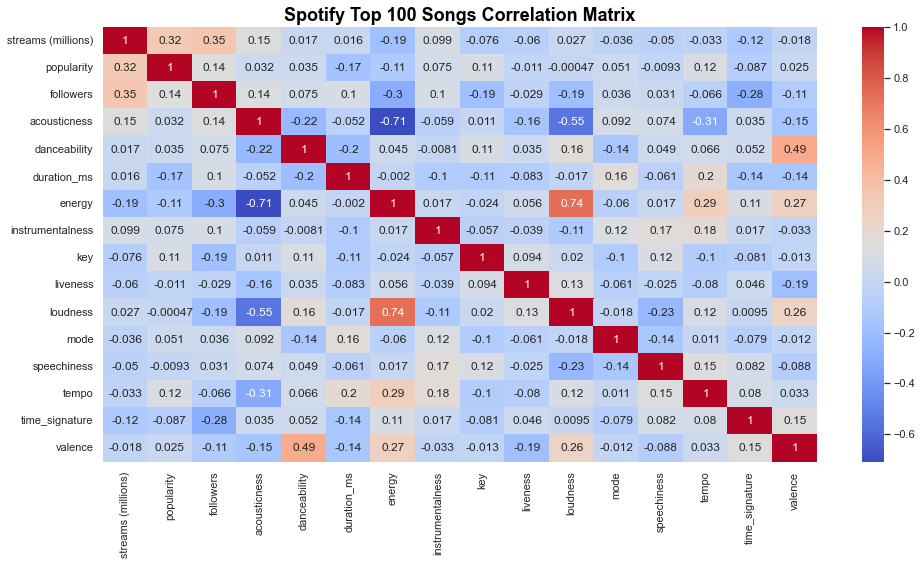

In [8]:
plt.figure(figsize=(16, 8))
plt.title('Spotify Top 100 Songs Correlation Matrix', c='black', fontsize=18, weight = 'bold')
sns.set(style="whitegrid")
corr = spotify_df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.savefig('correlation_matrix.png')